## Part 2 - Gaussian Filtering

In [3]:
# imports
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
import matplotlib.pyplot as plt

Question 1

In [4]:
def boxfilter(n):
    '''
    purpose: creates filter
    inputs: n, dimensions of the filtr
    outputs: normalized nxn array
    '''
    assert n % 2 != 0, "Dimension must be odd"
    out = np.array(np.ones((n,n))/n**2) # create and normalize filter values
    return out

# testing
print(boxfilter(3))
print(boxfilter(5))
print(boxfilter(4))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


AssertionError: Dimension must be odd

Question 2

In [5]:
def gauss1d(sigma):
    '''
    purpose: returns a 1D Gaussian filter for a given value of sigma
    inputs: sigma, width of Gaussian
    outputs: 1D array of length 6*sigma
    '''
    length = int(np.ceil(sigma*6)) # determine length of filter
    if length % 2 == 0: # round up to odd integer if needed
        length += 1
    filter = np.linspace(-(length//2), length//2, length) # create x vector
    filter = list(map(lambda x: np.exp(-x**2/(2*sigma**2)), filter)) # map 1D Gaussian along x values
    norm_filter = filter / np.sum(filter) # normalize
    return norm_filter

print(gauss1d(0.3))
print(gauss1d(0.5))
print(gauss1d(1))
print(gauss1d(2))

[0.00383626 0.99232748 0.00383626]
[0.10650698 0.78698604 0.10650698]
[0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]
[0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


Question 3

In [6]:

def gauss2d(sigma):
    '''
    purpose: generate 2D Gaussian filter
    inputs: sigma, width of Gaussian
    outputs: 2D filter
    '''
    filt1d = gauss1d(sigma) # create 1D Gauss filter
    filt2d = filt1d[np.newaxis] # extend 1D filter to 2D
    filt2d_gauss = signal.convolve2d(filt2d, filt2d.T) # convolve to create 2D filter
    return filt2d_gauss

print(gauss2d(0.5))
print(gauss2d(1))

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
[[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


Question 4

(a)

In [37]:
def convolve2d_manual(array, filter):
    '''
    purpose:  takes in an image (stored in array) and a filter, and performs convolution to the image with zero padding
    inputs: 2D array, 2D filter (np.float32)
    outputs: convolved array
    '''
    new_array = np.zeros(array.shape) # copy array to insert convolved values
    filt_size = filter.shape[0]
    assert filter.shape[0] == filter.shape[0], "Filter dimensions must be the same" # check filter is square
    pad_array = np.pad(array, filt_size//2) # pad array with zeros according to filter size
    for i in range(pad_array.shape[0]-filt_size): # iterate through rows
        for j in range(pad_array.shape[1]-filt_size): # iterate through columns
            sub_array = pad_array[i:i+filt_size, j:j+filt_size] # get neighborhood for convolution
            new_array[i,j] = np.sum(sub_array * filter) # get convolved value and place in new array
    return new_array

(b)

In [38]:
def gaussconvolve2d_manual(array, sigma):
    '''
    purpose: applies Gaussian convolution to a 2D array for the given value of sigma manually
    inputs: 2D array, sigma value
    outputs: Gaussian convolved image
    '''
    gauss_filt = gauss2d(sigma) # create filter
    convolved = convolve2d_manual(array, gauss_filt) # apply convolution
    return convolved


(c)

In [39]:
original = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\dog.jpg") # load image
img = original.convert('L')
img_float = np.float32(img) 
convolved = gaussconvolve2d_manual(img_float, 3)
convolved = np.uint8(convolved)
img_convolved = Image.fromarray(convolved)

(d)

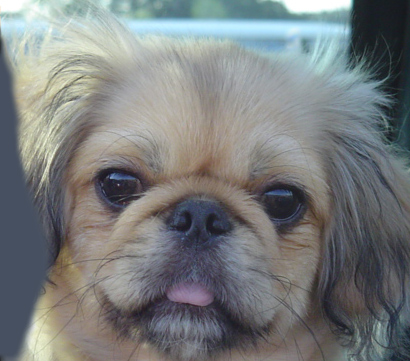

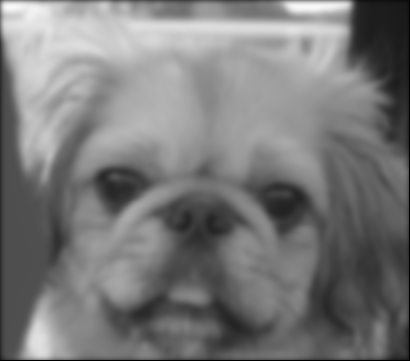

In [10]:
display(original)
display(img_convolved)

Question 5

(a)

In [11]:
def gaussconvolve2d_scipy(array, sigma):
    '''
    purpose: applies Gaussian convolution to a 2D array for the given value of sigma via scipy
    inputs: 2D array, sigma value
    outputs: Gaussian convolved image
    '''
    gauss_filt = gauss2d(sigma) # create filter
    convolved = signal.convolve2d(array, gauss_filt, 'same') # apply convolution
    return convolved


>Scipy has separate functions for convolve and correlate because although both operations involve multiplying local regions
using dot product-like operations with a filter, convolution and correlation only give the same result when the filter
is symmetric because the convolution operation involves flipping the input by 180 degrees. 

(b)

In [12]:
original = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\dog.jpg") # load image
img = original.convert('L')
img_float = np.float32(img) 
convolved = gaussconvolve2d_scipy(img_float, 3)
convolved = np.uint8(convolved)
img_convolved = Image.fromarray(convolved)

(c)

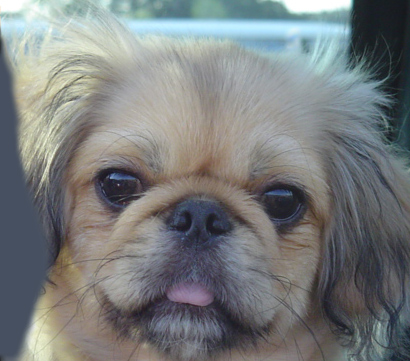

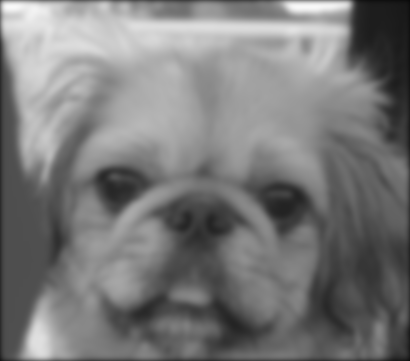

In [13]:
display(original)
display(img_convolved)

Question 6

In [14]:
original = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\dog.jpg") # load image
img = original.convert('L')
img_float = np.float32(img) 
# set timer for scipy
import time
t1 = time.time() # start timestamp
convolved = gaussconvolve2d_scipy(img_float, 10.0)
duration = time.time() - t1 # duration in seconds
print(duration)
# set timer for manual
t2 = time.time() # start timestamp
convolved = gaussconvolve2d_manual(img_float, 10.0)
duration = time.time() - t2 # duration in seconds
print(duration)

0.6218504905700684
1.6789672374725342


>The manual implementation of the convolution with a 2D Gaussian kernel takes more than twice the amount of time as the manual convolution. This is unsurprising given that the manual implementation uses nested for loops, which are not computationally efficient. Furthermore, only 1 value is computed per iteration of the inner loop, despite the fact that the same values are indexed multiple times in adjacent neighborhoods as the filter 'slides'.

Question 7

> Separability can refer to the independence between multiple dimensions/variables in the same input, allowing them to be separated into additive components without loss/perturbation of the available information. For an image, we have 2 dimensions (x and y) which are separable. Thus, instead of convolving the 2D input with a single 2D filter, we could convolve it with two 1D filters, one for each x and y direction. This would allow less matrix multiplication and more vector multiplication, speeding computation time.

## Part 3 - Hybrid Images

Question 1

In [15]:
cat = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\0a_cat.bmp")
dog = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\0b_dog.bmp")

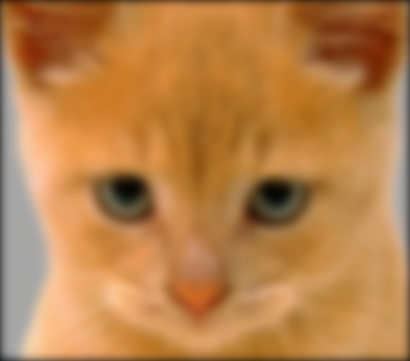

In [16]:
r, b, g = cat.split() # split into RGB channels
sigma = 5
channels = [np.float32(r), np.float32(b), np.float32(g)] 
blur_channels = [] 
for ch in channels: # loop over channels and apply Gaussian blur to each
    blur = gaussconvolve2d_scipy(ch, sigma)
    blur_channels.append(Image.fromarray(np.uint8(blur))) # convert back to Image
blur = Image.merge('RGB', (blur_channels[0],blur_channels[1],blur_channels[2])) # merge channels
display(blur)

Question 2

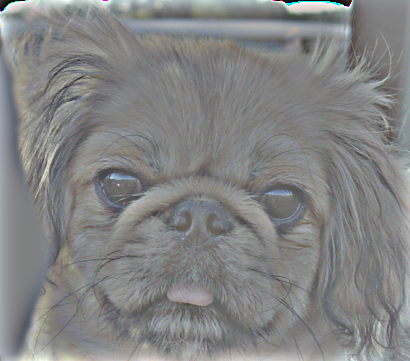

In [17]:
r, b, g = dog.split() # split into RGB channels
sigma = 10
channels = [np.float32(r), np.float32(b), np.float32(g)] 
sharp_channels = [] 
for ch in channels: # loop over channels and apply Gaussian blur to each
    blur = gaussconvolve2d_scipy(ch, sigma)
    diff = ch - blur + 128
    sharp_channels.append(Image.fromarray(np.uint8(diff))) # convert back to Image
sharp = Image.merge('RGB', (sharp_channels[0],sharp_channels[1],sharp_channels[2])) # merge channels
display(sharp)

Question 3

In [18]:
def hybridize(img1, img2, sigma):
    rgb1 = img1.split() # split into RGB channels
    rgb2 = img2.split()
    channels = [np.float32(r), np.float32(b), np.float32(g)] 
    merged = []
    for i in range(len(rgb1)): # loop over channels and apply Gaussian blur to each
        ch1, ch2 = rgb1[i], rgb2[i]
        blur = gaussconvolve2d_scipy(ch1, sigma)
        sharp = ch2 - gaussconvolve2d_scipy(ch2, sigma)
        # clamp values to remove artifacts
        blur = np.clip(blur,0,255)
        sharp = np.clip(sharp, 0,255)
        # add channels
        merged.append(Image.fromarray(np.uint8(blur)+np.uint8(sharp))) # convert back to Image
    final = Image.merge('RGB', (merged[0],merged[1],merged[2])) # merge channels
    display(final)

In [19]:
fish = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\3a_fish.bmp")
sub = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\3b_submarine.bmp")
man = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\2a_einstein.bmp")
woman = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\2b_marilyn.bmp")

Fish vs Sub

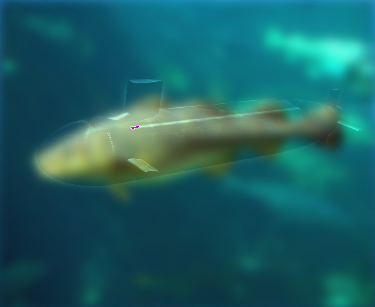

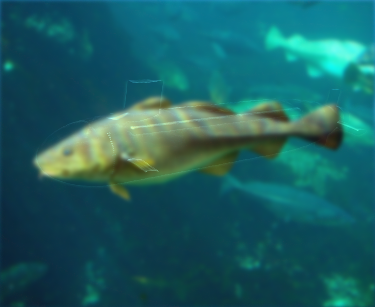

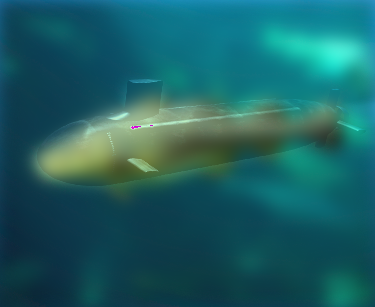

In [20]:
hybridize(fish, sub, 5)
hybridize(fish, sub, 2)
hybridize(fish, sub, 8)

People

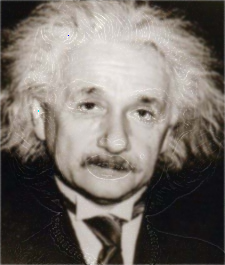

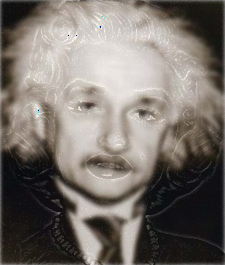

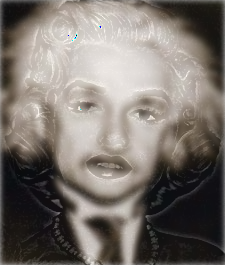

In [21]:
hybridize(man, woman, 1)
hybridize(man, woman, 2)
hybridize(man, woman, 3)

Cat vs Dog

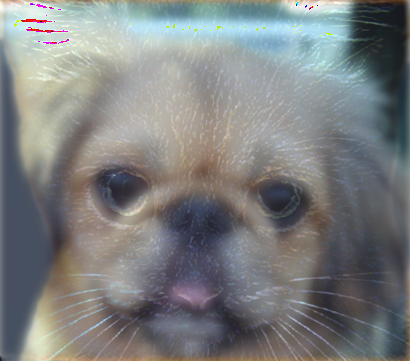

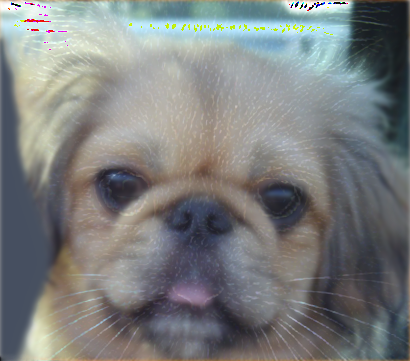

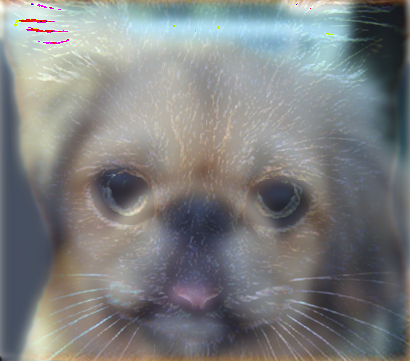

In [22]:
hybridize(dog, cat, 4)
hybridize(dog, cat, 2)
hybridize(dog, cat, 5)

## Part 4 - Denoising Filters

In [23]:
import cv2

Question 1

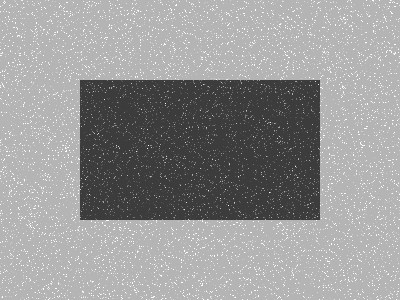

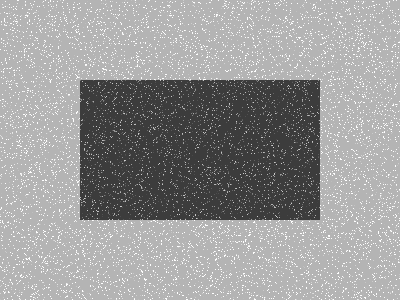

In [24]:
gauss = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\box_gauss.png")
speck = Image.open(r"C:\Users\Sadie\Documents\GitHub\CPSC_425\A1\box_speckle.png")

gauss = np.uint8(gauss)
speck = np.uint8(speck)
display(Image.fromarray(gauss))
display(Image.fromarray(speck))


Gaussian noise

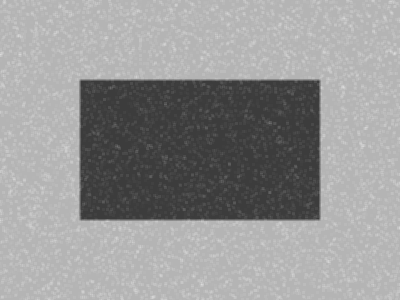

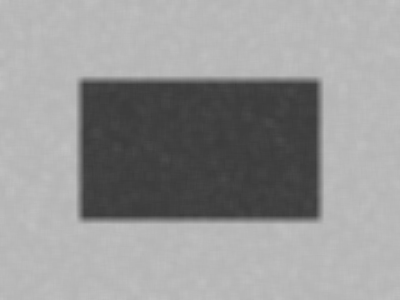

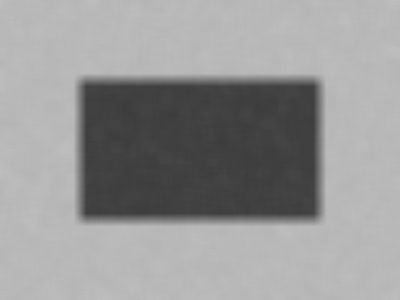

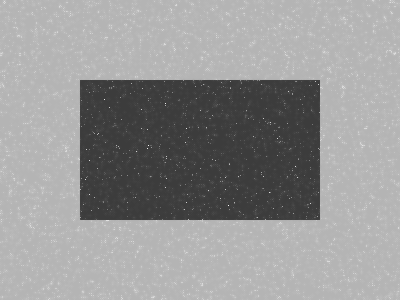

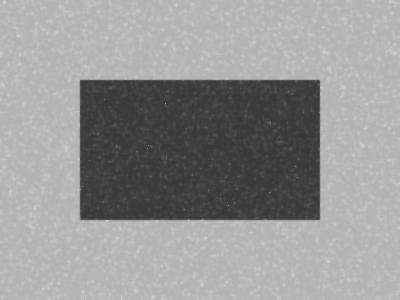

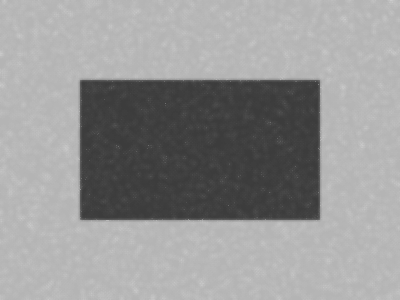

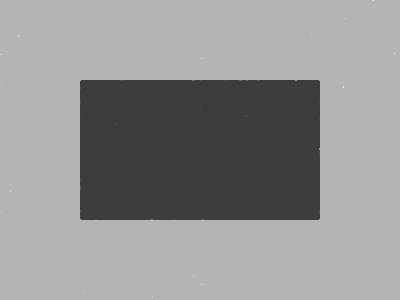

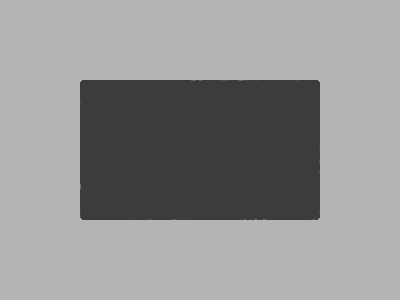

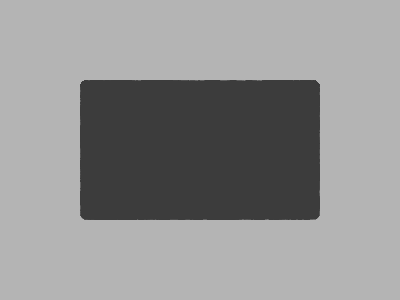

In [25]:
# Playing around
img=gauss
gauss1=cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=50)
display(Image.fromarray(gauss1))
gauss1=cv2.GaussianBlur(img, ksize=(9, 9), sigmaX=150)
display(Image.fromarray(gauss1))
gauss1=cv2.GaussianBlur(img, ksize=(13, 13), sigmaX=20)
display(Image.fromarray(gauss1))

gauss1=cv2.bilateralFilter(img, 5, sigmaColor=50, sigmaSpace=50)
display(Image.fromarray(gauss1))
gauss1=cv2.bilateralFilter(img, 5, sigmaColor=100, sigmaSpace=100)
display(Image.fromarray(gauss1))
gauss1=cv2.bilateralFilter(img, 7, sigmaColor=100, sigmaSpace=100)
display(Image.fromarray(gauss1))

gauss1=cv2.medianBlur(img,3)
display(Image.fromarray(gauss1))
gauss1=cv2.medianBlur(img,5)
display(Image.fromarray(gauss1))
gauss1=cv2.medianBlur(img,9)
display(Image.fromarray(gauss1))

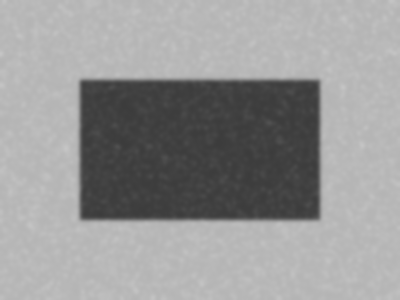

In [26]:
# Best
gauss1 = cv2.GaussianBlur(gauss, ksize=(11, 11), sigmaX=2)
display(Image.fromarray(gauss1))

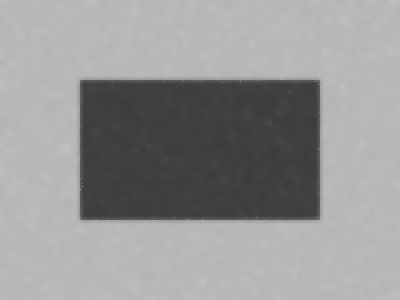

In [27]:
# Best
gauss2 = cv2.bilateralFilter(gauss, 11, sigmaColor=90, sigmaSpace=90)
display(Image.fromarray(gauss2))

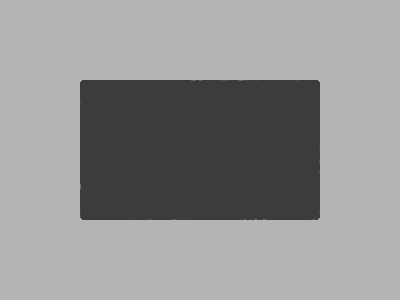

In [28]:
# Best
gauss3 = cv2.medianBlur(gauss,5)
display(Image.fromarray(gauss3))

Speckle noise

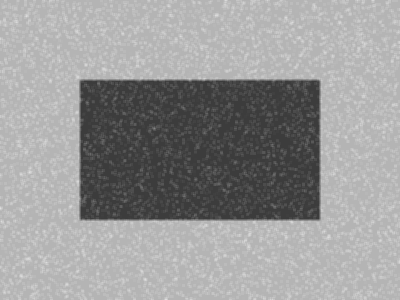

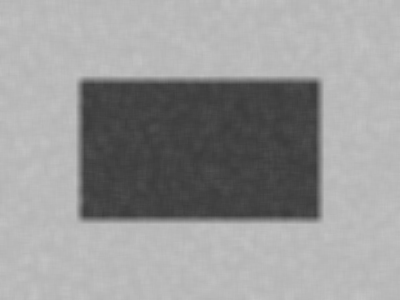

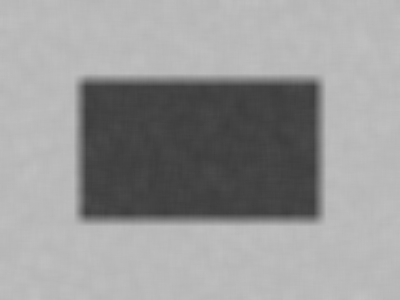

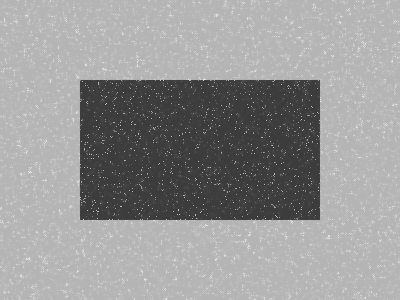

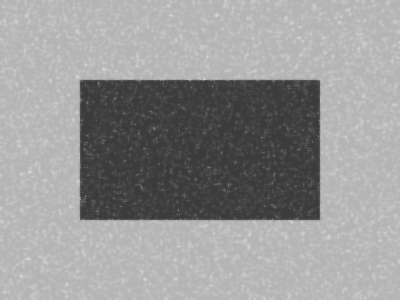

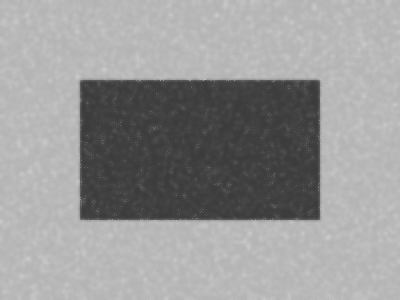

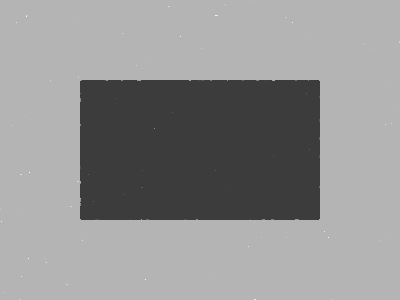

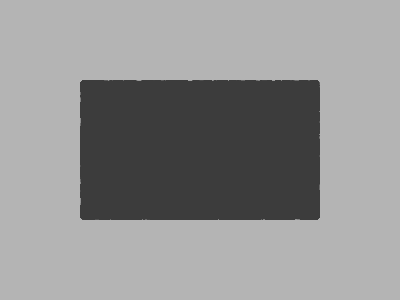

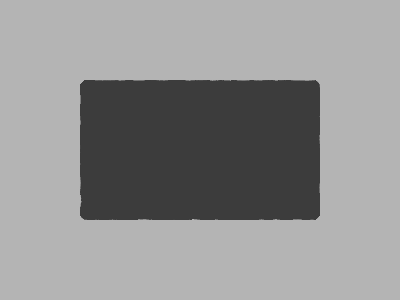

In [29]:
# Playing around
img=speck
speck1=cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=50)
display(Image.fromarray(speck1))
speck1=cv2.GaussianBlur(img, ksize=(9, 9), sigmaX=150)
display(Image.fromarray(speck1))
speck1=cv2.GaussianBlur(img, ksize=(13, 13), sigmaX=20)
display(Image.fromarray(speck1))

speck1=cv2.bilateralFilter(img, 5, sigmaColor=50, sigmaSpace=50)
display(Image.fromarray(speck1))
speck1=cv2.bilateralFilter(img, 5, sigmaColor=100, sigmaSpace=100)
display(Image.fromarray(speck1))
speck1=cv2.bilateralFilter(img, 7, sigmaColor=100, sigmaSpace=100)
display(Image.fromarray(speck1))

speck1=cv2.medianBlur(img,3)
display(Image.fromarray(speck1))
speck1=cv2.medianBlur(img,5)
display(Image.fromarray(speck1))
speck1=cv2.medianBlur(img,9)
display(Image.fromarray(speck1))

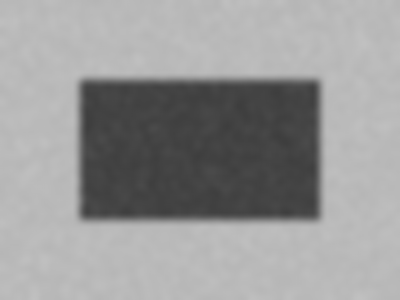

In [30]:
# Best
speck1 = cv2.GaussianBlur(speck, ksize=(15, 15), sigmaX=4)
display(Image.fromarray(speck1))

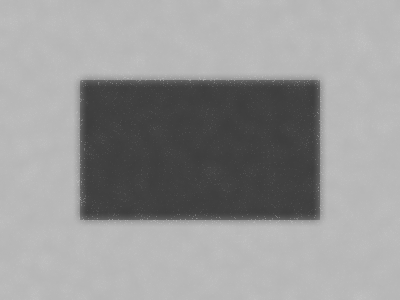

In [31]:
# Best
speck2 = cv2.bilateralFilter(speck, 17, sigmaColor=100, sigmaSpace=100)
display(Image.fromarray(speck2))

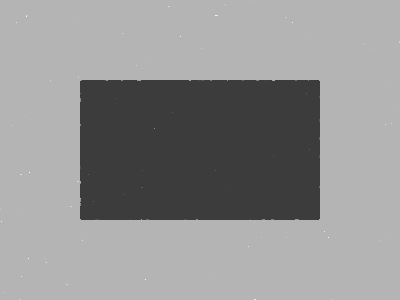

In [32]:
# Best
speck3 = cv2.medianBlur(speck,3)
display(Image.fromarray(speck3))

Question 2

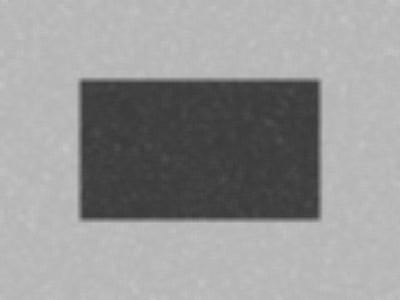

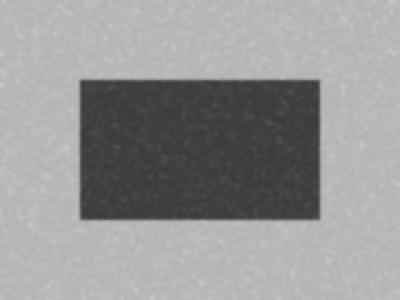

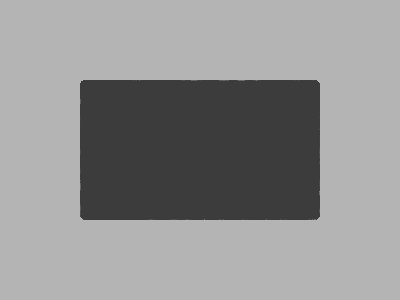

In [33]:
img=gauss
gauss1=cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
display(Image.fromarray(gauss1))
gauss1=cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
display(Image.fromarray(gauss1))
gauss1=cv2.medianBlur(img,7)
display(Image.fromarray(gauss1))

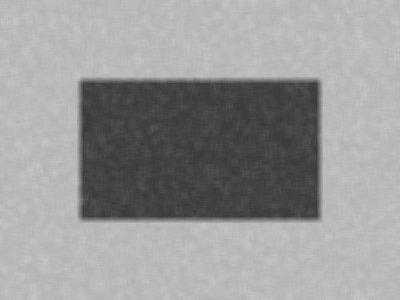

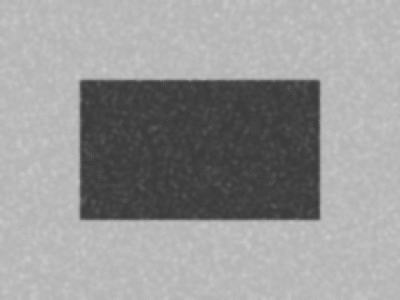

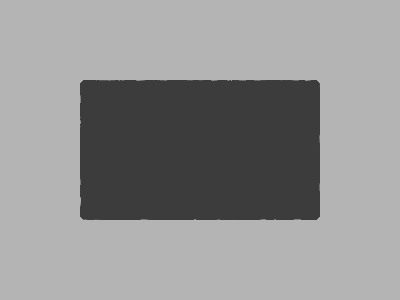

In [34]:
img=speck
speck1=cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
display(Image.fromarray(speck1))
speck1=cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
display(Image.fromarray(speck1))
speck1=cv2.medianBlur(img,7)
display(Image.fromarray(speck1))

The Gaussian blur filter reduces the prominence of the noise pixels in the image and improves the uniformity of both the inner and outer regions of the image, but it does not remove the noise entirely. Furthermore, the Gaussian filter severely blurs the margin between the inner and outer box in the image.

The bilateral filter behaves similarly to the Gaussian filter where the noise pixels are blurred and thus reduced in intensity relative to the signal pixels, but not removed fully. However, the margin between the dark center box and outer gray region is much crisper than for the Gaussian filter, which is an improvement. This is expected as the design of the bilateral filter is meant to preserve edges, where the Gaussian filter cannot.

Median filter is quite robust to high intensity pixel outliers thus it yields the bext denoising, however, it does produce high-intensity pixel artifacts if the kernel size is too small. These artifacts are more noticeable because the median filter does not average together multiple pixel values (thus diluting high intensity noise pixels) but rather selects a single pixel value from that neighborhood as a representative. Furthermore, the median filter alters the shape of the border between the inner and outer regions, where the border is sharp (unlike the Gaussian and bilateral filters) but not strictly rectangular, as shown by the degradation at the edges/corners, particularly in the speckle image. Despite this artifact, I would say the median filter still has the best denoising performance.